# Data Loaders Overview

This example demonstrates how to build scalable and maintainable Extract-Transform-Load (ETL) pipelines using Hamilton, focusing on the Extract phase. Hamilton allows for easy switching between different data sources without the need for cluttered if-else statements, making the dataflow modular and easier to maintain.

The goal is to show:
1. How to load data from various sources.
2. How to switch between different data sources using polymorphism.

Three data loaders are used in this example:

- Mock Data Loader: Generates mock data on the fly, useful for unit testing or quick iterations.
- CSV Data Loader: Reads data from CSV files, useful for ad-hoc research.
- DuckDB Data Loader: Loads data from a DuckDB database, representing more production-ready data pipelines.



# Pre-requisites

You need to have the following installed and set up:
- Hamilton
- pandas
- duckdb
- matplotlib

Execute the code commented below to install the above if you don't have them already installed.

In [1]:
# %pip install sf-hamilton pandas duckdb==0.5.0 matplotlib

In [2]:
# Importing all the things you need

import pandas as pd
from hamilton.function_modifiers import load_from, value
import duckdb
import numpy as np
from hamilton.function_modifiers import does, extract_columns, parameterize, source, value
import hamilton.driver
import load_data_csv
import load_data_duckdb
import load_data_mock
import prep_data


In [3]:
# Loading csv data

@load_from.csv(path=value("test_data/marketing_spend.csv"))
def spend(data: pd.DataFrame) -> pd.DataFrame:
    """Takes in the dataframe and then generates a date index column to it,
    where each row is a day starting from 2020-01-01"""
    data["date"] = pd.date_range(start="2020-01-01", periods=len(data), freq="D")
    return data


@load_from.csv(path=value("test_data/churn.csv"))
def churn(data: pd.DataFrame) -> pd.DataFrame:
    """Takes in the dataframe and then generates a date index column to it,
    where each row is a day starting from 2020-01-01
    """
    data["date"] = pd.date_range(start="2020-01-01", periods=len(data), freq="D")
    return data


@load_from.csv(path=value("test_data/signups.csv"))
def signups(data: pd.DataFrame) -> pd.DataFrame:
    """Takes in the dataframe and then generates a date index column to it,
    where each row is a day starting from 2020-01-01
    """
    data["date"] = pd.date_range(start="2020-01-01", periods=len(data), freq="D")
    return data

In [4]:
# Loading duckdb data

def connection(db_path: str) -> duckdb.DuckDBPyConnection:
    return duckdb.connect(database=db_path)


def spend(connection: duckdb.DuckDBPyConnection) -> pd.DataFrame:
    return connection.execute("select * from marketing_spend").fetchdf()


def churn(connection: duckdb.DuckDBPyConnection) -> pd.DataFrame:
    return connection.execute("select * from churn").fetchdf()


def signups(connection: duckdb.DuckDBPyConnection) -> pd.DataFrame:
    return connection.execute("select * from signups").fetchdf()


In [5]:
# loading mock data

def spend() -> pd.DataFrame:
    data = np.array(
        [
            (
                "2022-08-03T00:00:00.000000000",
                104052.98074001,
                115300.21226012,
                69384.46649019,
                49474.45580366,
                12851.6540992,
                1498.5114764,
                "2022-08-03T00:00:00.000000000",
            ),
            (
                "2022-08-04T00:00:00.000000000",
                103234.15793884,
                115326.0151612,
                71113.31018247,
                52513.19734904,
                12344.42778548,
                1033.79398268,
                "2022-08-04T00:00:00.000000000",
            ),
            (
                "2022-08-05T00:00:00.000000000",
                101816.40188563,
                115194.04661767,
                71367.20874633,
                51795.51413309,
                11536.41253561,
                2101.46146166,
                "2022-08-05T00:00:00.000000000",
            ),
            (
                "2022-08-06T00:00:00.000000000",
                102263.53043232,
                115601.2888751,
                71474.76280964,
                52861.22158421,
                11652.28867968,
                1046.83170946,
                "2022-08-06T00:00:00.000000000",
            ),
            (
                "2022-08-07T00:00:00.000000000",
                103271.09660695,
                115306.96341012,
                71888.99025677,
                50742.70043588,
                11160.23631976,
                2521.31311947,
                "2022-08-07T00:00:00.000000000",
            ),
            (
                "2022-08-08T00:00:00.000000000",
                100775.86701231,
                116634.88666304,
                71603.50462531,
                52361.08798097,
                12869.33161266,
                3269.57027156,
                "2022-08-08T00:00:00.000000000",
            ),
            (
                "2022-08-09T00:00:00.000000000",
                101527.74726883,
                114868.8422755,
                70260.81680881,
                49647.9754876,
                13187.07115589,
                2134.71274923,
                "2022-08-09T00:00:00.000000000",
            ),
            (
                "2022-08-10T00:00:00.000000000",
                101150.73295175,
                114941.32547639,
                68802.02668922,
                49590.55466274,
                13129.31334755,
                3328.0293293,
                "2022-08-10T00:00:00.000000000",
            ),
            (
                "2022-08-11T00:00:00.000000000",
                100317.64365959,
                115682.20050942,
                67735.95105252,
                50621.23723767,
                14019.11780391,
                2360.4382216,
                "2022-08-11T00:00:00.000000000",
            ),
            (
                "2022-08-12T00:00:00.000000000",
                102024.067597,
                116770.81592363,
                66244.22984364,
                49503.73825509,
                14533.2726457,
                1868.18205207,
                "2022-08-12T00:00:00.000000000",
            ),
        ],
        dtype=[
            ("index", "<M8[ns]"),
            ("facebook", "<f8"),
            ("twitter", "<f8"),
            ("tv", "<f8"),
            ("youtube", "<f8"),
            ("radio", "<f8"),
            ("billboards", "<f8"),
            ("date", "<M8[ns]"),
        ],
    )
    return pd.DataFrame.from_records(data)


def churn() -> pd.DataFrame:
    data = np.array(
        [
            ("2022-08-03T00:00:00.000000000", 160, 53, "2022-08-03T00:00:00.000000000"),
            ("2022-08-04T00:00:00.000000000", 162, 54, "2022-08-04T00:00:00.000000000"),
            ("2022-08-05T00:00:00.000000000", 162, 50, "2022-08-05T00:00:00.000000000"),
            ("2022-08-06T00:00:00.000000000", 161, 53, "2022-08-06T00:00:00.000000000"),
            ("2022-08-07T00:00:00.000000000", 160, 49, "2022-08-07T00:00:00.000000000"),
            ("2022-08-08T00:00:00.000000000", 160, 52, "2022-08-08T00:00:00.000000000"),
            ("2022-08-09T00:00:00.000000000", 161, 53, "2022-08-09T00:00:00.000000000"),
            ("2022-08-10T00:00:00.000000000", 160, 57, "2022-08-10T00:00:00.000000000"),
            ("2022-08-11T00:00:00.000000000", 156, 56, "2022-08-11T00:00:00.000000000"),
            ("2022-08-12T00:00:00.000000000", 148, 58, "2022-08-12T00:00:00.000000000"),
        ],
        dtype=[("index", "<M8[ns]"), ("womens", "<i8"), ("mens", "<i8"), ("date", "<M8[ns]")],
    )
    return pd.DataFrame.from_records(data)


def signups() -> pd.DataFrame:
    data = np.array(
        [
            ("2022-08-03T00:00:00.000000000", 2184, 429, "2022-08-03T00:00:00.000000000"),
            ("2022-08-04T00:00:00.000000000", 2164, 461, "2022-08-04T00:00:00.000000000"),
            ("2022-08-05T00:00:00.000000000", 2159, 454, "2022-08-05T00:00:00.000000000"),
            ("2022-08-06T00:00:00.000000000", 2157, 449, "2022-08-06T00:00:00.000000000"),
            ("2022-08-07T00:00:00.000000000", 2121, 478, "2022-08-07T00:00:00.000000000"),
            ("2022-08-08T00:00:00.000000000", 2151, 517, "2022-08-08T00:00:00.000000000"),
            ("2022-08-09T00:00:00.000000000", 2133, 541, "2022-08-09T00:00:00.000000000"),
            ("2022-08-10T00:00:00.000000000", 2160, 565, "2022-08-10T00:00:00.000000000"),
            ("2022-08-11T00:00:00.000000000", 2135, 609, "2022-08-11T00:00:00.000000000"),
            ("2022-08-12T00:00:00.000000000", 2116, 633, "2022-08-12T00:00:00.000000000"),
        ],
        dtype=[("index", "<M8[ns]"), ("womens", "<i8"), ("mens", "<i8"), ("date", "<M8[ns]")],
    )
    return pd.DataFrame.from_records(data)


In [6]:
# Preparing the data

def _sum_series(**series):
    return sum(series.values())


@extract_columns(
    "facebook_spend",
    "twitter_spend",
    "tv_spend",
    "youtube_spend",
    "radio_spend",
    "billboards_spend",
    "womens_churn",
    "mens_churn",
    "womens_signups",
    "mens_signups",
)
def joined_data(spend: pd.DataFrame, signups: pd.DataFrame, churn: pd.DataFrame) -> pd.DataFrame:
    spend = spend.set_index("date").rename(columns=lambda col: col + "_spend")
    churn = churn.set_index("date").rename(columns=lambda col: col + "_churn")
    signups = signups.set_index("date").rename(columns=lambda col: col + "_signups")
    return pd.concat([spend, churn, signups], axis=1)


@does(_sum_series)
def total_marketing_spend(
    facebook_spend: pd.Series,
    twitter_spend: pd.Series,
    tv_spend: pd.Series,
    youtube_spend: pd.Series,
    radio_spend: pd.Series,
    billboards_spend: pd.Series,
) -> pd.Series:
    pass


@does(_sum_series)
def total_signups(mens_signups: pd.Series, womens_signups: pd.Series) -> pd.Series:
    pass


@does(_sum_series)
def total_churn(mens_churn: pd.Series, womens_churn: pd.Series) -> pd.Series:
    pass


def total_customers(total_signups: pd.Series, total_churn: pd.Series) -> pd.Series:
    customer_deltas = total_signups + total_churn
    return customer_deltas.cumsum()


def acquisition_cost(total_marketing_spend: pd.Series, total_signups: pd.Series) -> pd.Series:
    return total_marketing_spend / total_signups


@parameterize(
    twitter_spend_smoothed={"lookback_days": value(7), "spend": source("twitter_spend")},
    facebook_spend_smoothed={"lookback_days": value(7), "spend": source("facebook_spend")},
    radio_spend_smoothed={"lookback_days": value(21), "spend": source("radio_spend")},
    tv_spend_smoothed={"lookback_days": value(21), "spend": source("tv_spend")},
    billboards_spend_smoothed={"lookback_days": value(7), "spend": source("billboards_spend")},
    youtube_spend_smoothed={"lookback_days": value(7), "spend": source("twitter_spend")},
)
def spend_smoothed(lookback_days: int, spend: pd.Series) -> pd.Series:
    """{spend} smoothed by {lookback_days}. Might want to smooth different ad spends differently,
    figuring that it takes different amounts of time to get to the customer. A cheap hack at determining
    auto-correlation of a series -- this should be a parameter in a model,
    but this is to demonstrate the framework

    :param lookback_days: Days to smooth over
    :param spend: Spend source
    :return:
    """
    return spend.rolling(window=lookback_days).mean().fillna(0)


In [7]:
VARS = [
    "total_signups",
    "total_churn",
    "total_marketing_spend",
    "acquisition_cost",
    "twitter_spend_smoothed",
    "facebook_spend_smoothed",
    "radio_spend_smoothed",
    "tv_spend_smoothed",
    "billboards_spend_smoothed",
    "youtube_spend_smoothed",
]

In [ ]:
# Execution for duckdb data

driver = hamilton.driver.Driver(
    {"db_path": "./test_data/database.duckdb"}, load_data_duckdb, prep_data
)
print(driver.execute(VARS))
duckdb_execution_graph = driver.visualize_execution(VARS)
display(duckdb_execution_graph)

c:\Users\obeng\Desktop\open_source\venv\Lib\site-packages\hamilton\plugins\pandas_extensions.py:249: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df = pd.read_csv(self.path, **self._get_loading_kwargs())
c:\Users\obeng\Desktop\open_source\venv\Lib\site-packages\hamilton\plugins\pandas_extensions.py:249: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(self.path, **self._get_loading_kwargs())
c:\Users\obeng\Desktop\open_source\venv\Lib\site-packages\hamilton\plugins\pandas_extensions.py:249: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  df = pd.read_csv(self.path, **self._get_loading_kwargs())
c:\Users\obeng\Desktop\open_source\venv\Lib\site-packages\hamilton\plugins\pandas_extensions.py:2

            total_signups  total_churn  total_marketing_spend  \
date                                                            
2020-01-01           1947          203           52730.560003   
2020-01-02           1910          197           49279.312391   
2020-01-03           1899          203           51302.996119   
2020-01-04           1930          197           56406.767429   
2020-01-05           1893          200           62571.780395   
...                   ...          ...                    ...   
2022-08-28           2827          191          363933.708589   
2022-08-29           2843          192          368187.139781   
2022-08-30           2822          192          364502.996497   
2022-08-31           2870          184          361548.842342   
2022-09-01           2853          185          357315.802822   

            acquisition_cost  twitter_spend_smoothed  facebook_spend_smoothed  \
date                                                                     

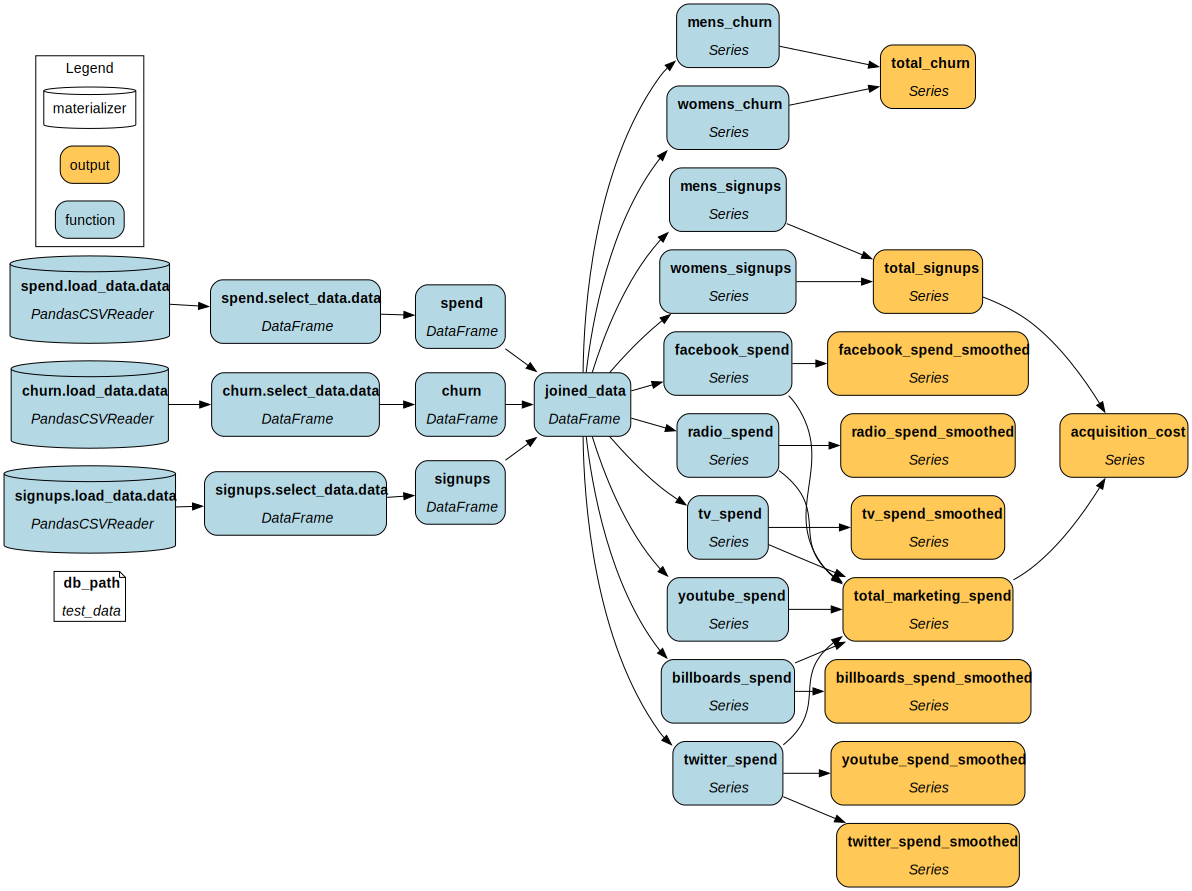

In [8]:
# Execution for csv data

driver = hamilton.driver.Driver({"db_path": "test_data"}, load_data_csv, prep_data)
print(driver.execute(VARS))
csv_execution_graph = driver.visualize_execution(VARS)
display(csv_execution_graph)

            total_signups  total_churn  total_marketing_spend  \
date                                                            
2022-08-03           2613          213          352562.280870   
2022-08-04           2625          216          355564.902400   
2022-08-05           2613          212          353811.045380   
2022-08-06           2606          214          354899.924090   
2022-08-07           2599          209          354891.300149   
2022-08-08           2668          212          357514.248166   
2022-08-09           2674          214          351627.165746   
2022-08-10           2725          217          350941.982457   
2022-08-11           2744          212          350736.588485   
2022-08-12           2749          206          350944.306317   

            acquisition_cost  twitter_spend_smoothed  facebook_spend_smoothed  \
date                                                                            
2022-08-03        134.926246                0.000000     

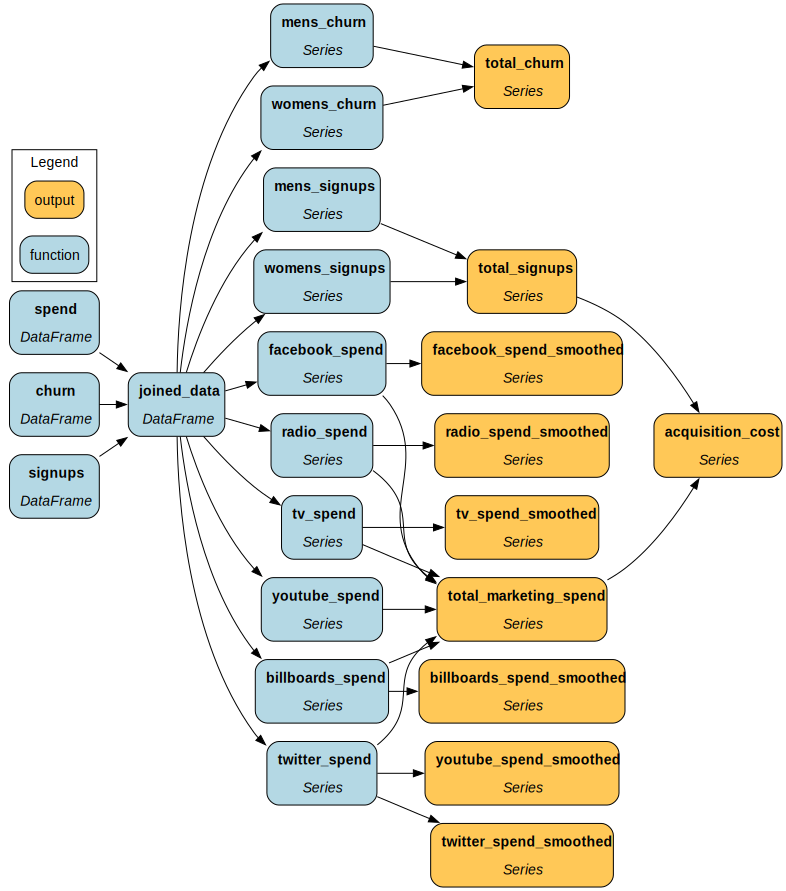

In [9]:
# Execution for mock data

driver = hamilton.driver.Driver({}, load_data_mock, prep_data)
print(driver.execute(VARS))
mock_execution_graph = driver.visualize_execution(VARS)
display(mock_execution_graph)